You should implement at least the modules Linear (fully connected layer), ReLU , Tanh , Sequential
to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
from torch import FloatTensor
import math
import matplotlib.pyplot as plt

In [3]:
from sequential import Sequential
from linear import Linear
from activations import ReLU, tanh
from losses import MSE
from utils import build_data

In [4]:
"""import traceback
import warnings
import sys

def warn_with_traceback(message, category, filename, lineno, file=None, line=None):

    log = file if hasattr(file,'write') else sys.stderr
    traceback.print_stack(file=log)
    log.write(warnings.formatwarning(message, category, filename, lineno, line))

warnings.showwarning = warn_with_traceback"""

"import traceback\nimport warnings\nimport sys\n\ndef warn_with_traceback(message, category, filename, lineno, file=None, line=None):\n\n    log = file if hasattr(file,'write') else sys.stderr\n    traceback.print_stack(file=log)\n    log.write(warnings.formatwarning(message, category, filename, lineno, line))\n\nwarnings.showwarning = warn_with_traceback"

In [5]:
x_train, y_train = build_data(1000)
x_validation, y_validation = build_data(100)

In [6]:
model = Sequential(MSE(), input_size=2, output_size=1)
model.add(Linear(2, 25))
model.add(ReLU(25))
model.add(Linear(25, 25))
model.add(ReLU(25))
model.add(Linear(25, 25))
model.add(ReLU(25))
model.add(Linear(25, 1))

In [9]:
preds = model.fit(x_train, y_train, x_validation, y_validation, epochs=10, step_size=0.0001)

/usr/local/lib/python3.5/dist-packages/torch/tensor.py:318: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.sub_(other)


0.24169654
Validation loss : 0.2416965365409851
Validation accuracy : 0.61


In [30]:
preds = model.predict(x_validation)

In [35]:
preds[preds.squeeze() > 0.5] = 1
preds[preds.squeeze() <= 0.5] = 0
preds

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

In [7]:
xs = []
ys = []
for i in range(len(x_train)):
    if y_train[i][0] == 0:
        xs.append(x_train[i][0])
        ys.append(x_train[i][1])

In [8]:
xss = []
yss = []
for i in range(len(x_train)):
    if y_train[i][0] == 1:
        xss.append(x_train[i][0])
        yss.append(x_train[i][1])

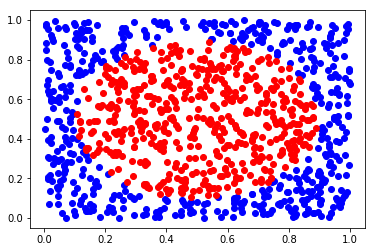

In [9]:
plt.plot(xs, ys, 'ro', color='blue')
plt.plot(xss, yss, 'ro', color='red')

In [14]:
preds = model.fit(x_train, y_train, epochs=10, step_size=0.0001)

/usr/local/lib/python3.5/dist-packages/torch/tensor.py:318: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.sub_(other)


In [19]:
def round(a):
    if a > 1/2:
        return 1
    else:
        return 0
    
for i in range(len(preds)):
    preds[i] = round(preds[i])

In [29]:
(y_train.numpy().squeeze() == preds).sum()

947

In [9]:
_, idx = torch.max(preds, dim=1)
sum(idx.numpy() == y_train[:, 1].numpy())

NameError: name 'preds' is not defined

In [30]:
assert 0 == 1

AssertionError: 

In [13]:
count = 0
for i in range(len(preds)):
    if preds[i, 0] == y_train[i, 0] and y_train[i, 0] == 0:
        continue
    if preds[i, 0] == y_train[i, 0] and y_train[i, 0] == 0:
        count += 1
    elif preds[i, 1] == y_train[i, 1] and y_train[i, 1] == 0:
        count += 1

In [14]:
count

418